# Movie Recommendation System

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import *
sns.set_style('dark')
%matplotlib inline

In [11]:
df=pd.read_csv('Dataset.csv')
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df=pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


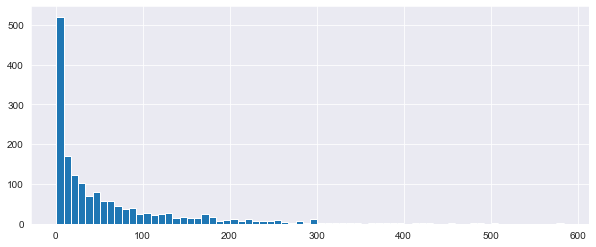

In [18]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)
plt.show()

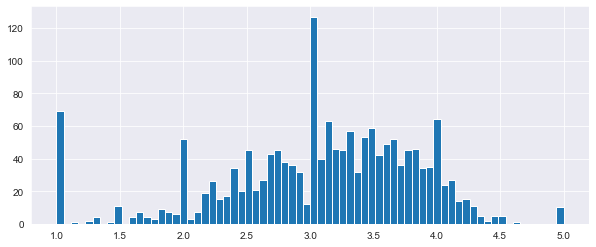

In [19]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)
plt.show()

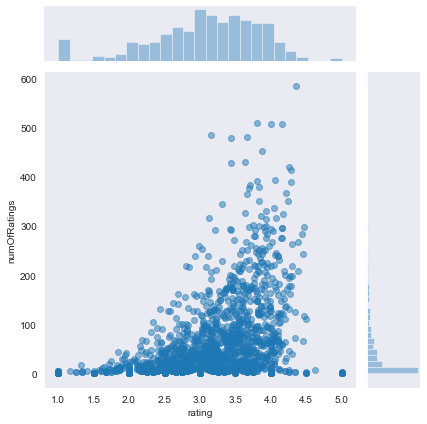

In [21]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)
plt.show()

# Recommendation Model Creation

In [22]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [24]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]

C:\Users\ROHAN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ROHAN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (1951)
Alien (1979)
Alien 3 (1992)
Alien

Daylight (1996)
Days of Thunder (1990)
Daytrippers, The (1996)
Dazed and Confused (1993)
Dead Man (1995)
Dead Man Walking (1995)
Dead Poets Society (1989)
Dead Presidents (1995)
Dear God (1996)
Death and the Maiden (1994)
Deceiver (1997)
Deconstructing Harry (1997)
Deep Rising (1998)
Deer Hunter, The (1978)
Delicatessen (1991)
Delta of Venus (1994)
Demolition Man (1993)
Denise Calls Up (1995)
Designated Mourner, The (1997)
Desperado (1995)
Desperate Measures (1998)
Devil in a Blue Dress (1995)
Devil's Advocate, The (1997)
Devil's Own, The (1997)
Diabolique (1996)
Dial M for Murder (1954)
Die Hard (1988)
Die Hard 2 (1990)
Die Hard: With a Vengeance (1995)
Die xue shuang xiong (Killer, The) (1989)
Dingo (1992)
Dirty Dancing (1987)
Disclosure (1994)
Diva (1981)
Dolores Claiborne (1994)
Don Juan DeMarco (1995)
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)
Donnie Brasco (1997)
Doom Generation, The (1995)
Doors, The (1991)
Double Happiness (1994)
Double Team

Island of Dr. Moreau, The (1996)
It Could Happen to You (1994)
It Happened One Night (1934)
It Takes Two (1995)
It's My Party (1995)
It's a Wonderful Life (1946)
Jack (1996)
Jack and Sarah (1995)
Jackal, The (1997)
Jackie Brown (1997)
Jackie Chan's First Strike (1996)
Jade (1995)
James and the Giant Peach (1996)
Jane Eyre (1996)
Jason's Lyric (1994)
Jaws (1975)
Jaws 2 (1978)
Jaws 3-D (1983)
Jean de Florette (1986)
Jefferson in Paris (1995)
Jeffrey (1995)
Jerky Boys, The (1994)
Jerry Maguire (1996)
Jimmy Hollywood (1994)
Jingle All the Way (1996)
Joe's Apartment (1996)
Johnny 100 Pesos (1993)
Johnny Mnemonic (1995)
Journey of August King, The (1995)
Joy Luck Club, The (1993)
Jude (1996)
Judge Dredd (1995)
Judgment Night (1993)
Jumanji (1995)
Jungle Book, The (1994)
Jungle2Jungle (1997)
Junior (1994)
Jurassic Park (1993)
Juror, The (1996)
Jury Duty (1995)
Just Cause (1995)
Kalifornia (1993)
Kama Sutra: A Tale of Love (1996)
Kansas City (1996)
Kaspar Hauser (1993)
Kazaam (1996)
Keys to Tu

Paradise Road (1997)
Parent Trap, The (1961)
Paris Is Burning (1990)
Paris, France (1993)
Paris, Texas (1984)
Party Girl (1995)
Passion Fish (1992)
Pather Panchali (1955)
Paths of Glory (1957)
Patton (1970)
Peacemaker, The (1997)
Penny Serenade (1941)
People vs. Larry Flynt, The (1996)
Perez Family, The (1995)
Perfect Candidate, A (1996)
Perfect World, A (1993)
Persuasion (1995)
Pest, The (1997)
Pete's Dragon (1977)
Phantom, The (1996)
Phantoms (1998)
Phat Beach (1996)
Phenomenon (1996)
Philadelphia (1993)
Philadelphia Story, The (1940)
Piano, The (1993)
Picnic (1955)
Picture Bride (1995)
Picture Perfect (1997)
Pie in the Sky (1995)
Pillow Book, The (1995)
Pink Floyd - The Wall (1982)
Pinocchio (1940)
Platoon (1986)
Playing God (1997)
Pocahontas (1995)
Poetic Justice (1993)
Poison Ivy II (1995)
Pollyanna (1960)
Pompatus of Love, The (1996)
Ponette (1996)
Portrait of a Lady, The (1996)
Postino, Il (1994)
Postman, The (1997)
Powder (1995)
Preacher's Wife, The (1996)
Pretty Woman (1990)
P

Tie That Binds, The (1995)
Time Tracers (1995)
Time to Kill, A (1996)
Timecop (1994)
Tin Cup (1996)
Tin Drum, The (Blechtrommel, Die) (1979)
Tin Men (1987)
Titanic (1997)
To Be or Not to Be (1942)
To Catch a Thief (1955)
To Die For (1995)
To Gillian on Her 37th Birthday (1996)
To Have, or Not (1995)
To Kill a Mockingbird (1962)
To Live (Huozhe) (1994)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
Tom & Viv (1994)
Tom and Huck (1995)
Tombstone (1993)
Tommy Boy (1995)
Tomorrow Never Dies (1997)
Top Gun (1986)
Top Hat (1935)
Total Eclipse (1995)
Touch (1997)
Touch of Evil (1958)
Tough and Deadly (1995)
Toy Story (1995)
Trainspotting (1996)
Transformers: The Movie, The (1986)
Traveller (1997)
Treasure of the Sierra Madre, The (1948)
Trees Lounge (1996)
Trial and Error (1997)
Trial by Jury (1994)
Trigger Effect, The (1996)
True Crime (1995)
True Lies (1994)
True Romance (1993)
Truman Show, The (1998)
Trust (1990)
Truth About Cats & Dogs, The (1996)
Truth or Consequences, N.M. (199

# Testing Phase

In [25]:
#Check the result 
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [26]:
ratings = ratings.fillna('-')

In [27]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [28]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()


,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [29]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

Titanic (1997)
To Be or Not to Be (1942)
To Catch a Thief (1955)
To Cross the Rubicon (1991)
To Die For (1995)
To Gillian on Her 37th Birthday (1996)
To Have, or Not (1995)
To Kill a Mockingbird (1962)
To Live (Huozhe) (1994)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
Tokyo Fist (1995)
Tom & Viv (1994)
Tom and Huck (1995)
Tombstone (1993)
Tommy Boy (1995)
Tomorrow Never Dies (1997)
Top Gun (1986)
Top Hat (1935)
Total Eclipse (1995)
Touch (1997)
Touch of Evil (1958)
Tough and Deadly (1995)
Touki Bouki (Journey of the Hyena) (1973)
Toy Story (1995)
Trainspotting (1996)
Transformers: The Movie, The (1986)
Traveller (1997)
Treasure of the Sierra Madre, The (1948)
Trees Lounge (1996)
Trial and Error (1997)
Trial by Jury (1994)
Trigger Effect, The (1996)
True Crime (1995)
True Lies (1994)
True Romance (1993)
Truman Show, The (1998)
Trust (1990)
Truth About Cats & Dogs, The (1996)
Truth or Consequences, N.M. (1997)
Turbo: A Power Rangers Movie (1997)
Turbulence (1997)
Turning, Th

In [30]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)

In [32]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='Across the Sea of Time')

Your Recommendations for the Movie Across the Sea of Time (1995) are:

1:Star Trek: Generations (1994) 
2:Beauty and the Beast (1991) 
3:Benny & Joon (1993) 
4:GoldenEye (1995)
